In [1]:
import keras
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

Using TensorFlow backend.


In [2]:
#Summary of a model that returns a 2D Tensor (batch_sizes, output_features)
#This model only returns the last output for each input sequence
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
#Summary of a model that returns a 3D Tensor (batch_sizes, timesteps, output_features)
#Returns the full sequence of succesive outputs for each timestep
#This is used in every intermediate layer, when stacking several recurrent layers on top of each other
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
#Now we use a RNN for our movie review classification
#First preprocess the data
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [5]:
#Train a simple RNN
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 22s - loss: 0.6548 - acc: 0.6025 - val_loss: 0.5698 - val_acc: 0.7372
Epoch 2/10
20000/20000 [==============================] - 21s - loss: 0.4273 - acc: 0.8213 - val_loss: 0.3985 - val_acc: 0.8298
Epoch 3/10
20000/20000 [==============================] - 19s - loss: 0.2879 - acc: 0.8877 - val_loss: 0.3897 - val_acc: 0.8470
Epoch 4/10
20000/20000 [==============================] - 19s - loss: 0.2031 - acc: 0.9244 - val_loss: 0.4932 - val_acc: 0.7730
Epoch 5/10
20000/20000 [==============================] - 20s - loss: 0.1485 - acc: 0.9456 - val_loss: 0.5297 - val_acc: 0.7686
Epoch 6/10
20000/20000 [==============================] - 21s - loss: 0.1053 - acc: 0.9634 - val_loss: 1.2048 - val_acc: 0.7082
Epoch 7/10
20000/20000 [==============================] - 19s - loss: 0.0805 - acc: 0.9736 - val_loss: 0.4616 - val_acc: 0.8546
Epoch 8

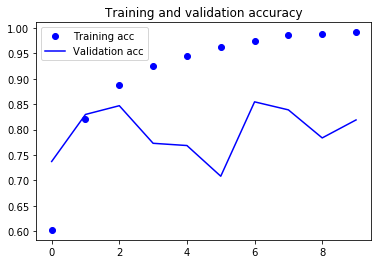

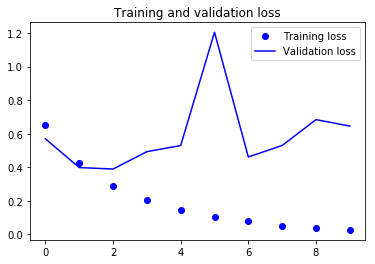

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()